### Using pre-trained model

Today we're going to build and fine-tune CNN based on weights pre-trained on ImageNet: the largest image classification dataset as of now.
More about imagenet: http://image-net.org/
Setup: classify from a set of 1000 classes.

In [10]:
import requests

# class labels
LABELS_URL = 'https://s3.amazonaws.com/outcome-blog/imagenet/labels.json'
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()}

In [11]:
print(list(labels.items())[:5])

[(0, 'tench, Tinca tinca'), (1, 'goldfish, Carassius auratus'), (2, 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias'), (3, 'tiger shark, Galeocerdo cuvieri'), (4, 'hammerhead, hammerhead shark')]


In [1]:
!pip3 install torch torchvision

    100% |████████████████████████████████| 519.5MB 24kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5966c000 @  0x7f58c0ee62a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 17.7MB/s 
    100% |████████████████████████████████| 2.0MB 4.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


### TorchVision
PyTorch has several companion libraries, one of them being [torchvision](https://github.com/pytorch/vision/tree/master/) - it contains a number of popular vision datasets, preprocessing tools and most importantly, [pre-trained models](https://github.com/pytorch/vision/tree/master/torchvision/models).

For now, we're going to use torch Inception-v3 module.

We're gonna use the inception-v3 network:
![img](https://hackathonprojects.files.wordpress.com/2016/09/googlenet_diagram.png?w=650&h=192)

Let's first look at the code here: [url](https://github.com/pytorch/vision/blob/master/torchvision/models/inception.py)

In [9]:
from torchvision.models.inception import inception_v3

model = inception_v3(pretrained=True,      # load existing weights
                     transform_input=True, # preprocess input image the same way as in training
                    )

model.aux_logits = False # don't predict intermediate logits (yellow layers at the bottom)
model.train(False)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
import torch
from torch.autograd import Variable

dummy_x = Variable(torch.randn(5, 3, 299, 299))
model(dummy_x)

tensor([[-1.1905,  0.8744,  1.7285,  ..., -2.2320, -0.3552,  1.8678],
        [-1.1514,  0.7375,  1.6172,  ..., -2.3239, -0.5325,  1.7843],
        [-0.9244,  0.9993,  1.7536,  ..., -2.1790, -0.6910,  1.6637],
        [-0.8989,  0.7849,  2.0689,  ..., -2.1429, -0.4896,  1.4312],
        [-1.2040,  1.1708,  2.0707,  ..., -2.1749, -0.4644,  1.7318]],
       grad_fn=<ThAddmmBackward>)

### Predict class probabilities

In [0]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline
import numpy as np

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


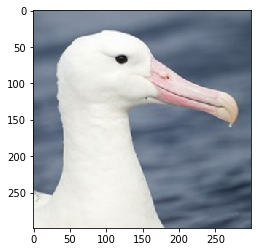

top-10 classes are: 
 [prob : class label]
0.9743 :	albatross
0.0031 :	turnstile
0.0005 :	Shetland sheepdog
0.0005 :	llama
0.0004 :	collie
0.0003 :	drake
0.0003 :	hammerhead
0.0003 :	nipple
0.0003 :	Polaroid camera


In [0]:

img = imresize(plt.imread('sample_images/albatross.jpg'), (299,299)) / 255.
plt.imshow(img)
plt.show()

img = Variable(torch.FloatTensor(img.reshape([1, 299, 299, 3]).transpose([0,3,1,2])))

probs = torch.nn.functional.softmax(model(img), dim=-1)

probs = probs.data.numpy()

top_ix = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are: \n [prob : class label]')
for l in top_ix:
    print ('%.4f :\t%s' % (probs.ravel()[l], labels[l].split(',')[0]))



### Having fun with pre-trained nets

In [0]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O images/img.jpg

--2018-10-14 15:44:08--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 104.18.63.175, 104.18.62.175, 2606:4700:30::6812:3faf, ...
Connecting to cdn.com.do (cdn.com.do)|104.18.63.175|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg [following]
--2018-10-14 15:44:08--  https://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Connecting to cdn.com.do (cdn.com.do)|104.18.63.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51048 (50K) [image/jpeg]
Saving to: ‘images/img.jpg’

images/img.jpg      100%[===================>]  49.85K  --.-KB/s    in 0.07s   

2018-10-14 15:44:08 (761 KB/s) - ‘images/img.jpg’ saved [51048/51048]



/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


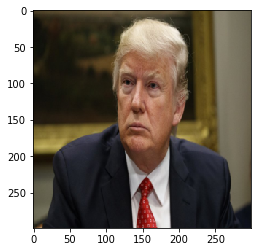

top-10 classes are: 
 [prob : class label]
0.7015 :	suit
0.0973 :	Windsor tie
0.0573 :	groom
0.0043 :	oboe
0.0040 :	academic gown
0.0038 :	Loafer
0.0032 :	Afghan hound
0.0029 :	wig
0.0028 :	Sussex spaniel


In [0]:
img = imresize(plt.imread('images/img.jpg'), (299,299)) / 255.
plt.imshow(img)
plt.show()

img = torch.tensor(img.reshape([1, 299, 299, 3]).transpose([0,3,1,2]),dtype=torch.float32,requires_grad=True)

probs = torch.nn.functional.softmax(model(img), dim=-1)

probs = probs.data.numpy()

top_ix = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are: \n [prob : class label]')
for l in top_ix:
    print ('%.4f :\t%s' % (probs.ravel()[l], labels[l].split(',')[0]))

### NN hacking

In [0]:
labels[2]

'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias'

In [0]:
img = imresize(plt.imread('images/img.jpg'), (299,299)) / 255.
img = torch.tensor(img.reshape([1, 299, 299, 3]).transpose([0,3,1,2]),
                   dtype=torch.float32, requires_grad=True)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


top-10 classes are: 
 [prob : class label]
0.9278 :	great white shark
0.0115 :	sturgeon
0.0109 :	tiger shark
0.0085 :	dugong
0.0040 :	hammerhead
0.0013 :	stage
0.0011 :	coho
0.0010 :	gar
0.0008 :	tub


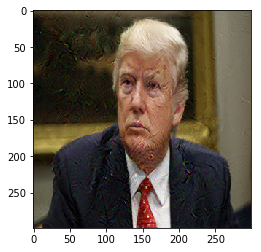

In [0]:
log_probs = torch.nn.functional.log_softmax(model(img), dim=-1)
logp = log_probs[0, 2]

logp.backward()

img.data += img.grad.data
img.data.clamp_(0, 1)

img.grad.zero_();

plt.imshow(img.data.numpy()[0].transpose([1, 2, 0]))

probs = torch.nn.functional.softmax(model(img), dim=-1)

probs = probs.data.numpy()

top_ix = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are: \n [prob : class label]')
for l in top_ix:
    print ('%.4f :\t%s' % (probs.ravel()[l], labels[l].split(',')[0]))

# Grand-quest: Dogs Vs Cats
* original competition
* https://www.kaggle.com/c/dogs-vs-cats
* 25k JPEG images of various size, 2 classes (guess what)

### Your main objective
* In this seminar your goal is to fine-tune a pre-trained model to distinguish between the two rivaling animals
* The first step is to just reuse some network layer as features

In [2]:
!wget https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1 -O data.zip
!unzip data.zip

--2018-10-27 22:25:34--  https://www.dropbox.com/s/d61lupw909hc785/dogs_vs_cats.train.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/d61lupw909hc785/dogs_vs_cats.train.zip [following]
--2018-10-27 22:25:35--  https://www.dropbox.com/s/dl/d61lupw909hc785/dogs_vs_cats.train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf8a50e9ca5fa0484ffd60102dd.dl.dropboxusercontent.com/cd/0/get/AUGNiFD48vE4JgY649V7vIoEQUBS7TX8iF4j_d-GzaRJRq3QELgMlJP53ggV3KSPdmXHZi4VKHeXxpQqFxmidjwSfoxbmQkhjioKSNW31kblvHRpJbLH63qIi_0atpGnzRvPSjieFs2-8BldfWxCwDg8SaIIknVbs_zBVC3YMk61oZ6PjG2Vx-pSxrzAJeg1jW8/file?dl=1 [following]
--2018-10-27 22:25:36--  https://ucf8a50e9ca5fa0484ffd60102dd.dl.dropboxusercontent.com/cd/0/get/AUGNiFD48vE4JgY649V

### How to get features
During good old days in Torch7 you could access any intermediate output from the sequential model. Nowadays it's a bit more difficult though it's not Tensorflow where you need to compile another model for that. Here we're going to redefine the last layer... yes, to do nothing.

In [0]:
from copy import deepcopy  # in case you still need original model

embedding = deepcopy(model)

class Identity(torch.nn.Module):

    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x
        

In [0]:
list(embedding.named_modules())[-1]

('fc', Linear(in_features=2048, out_features=1000, bias=True))

In [0]:
    
# redefine the last layer to be Identity
embedding.fc = Identity()

assert embedding(img).data.numpy().shape == (1, 2048), "your output for single image should have shape (1, 2048)"

In [0]:
embedding.to("cuda")

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

# for starters
* Train sklearn model, evaluate validation accuracy (should be >80%)

In [0]:
#extract features from images
from tqdm import tqdm
from scipy.misc import imread, imresize
import os

In [0]:
X = []
Y = []

batch_size = 64
imgs = np.zeros([batch_size, 299, 299, 3])
batch_index = 0

for fname in tqdm(os.listdir('train')):
    
    y = fname.startswith("cat")
    Y.append(y)
    
    img = imread(os.path.join("train", fname))
    
    img = imresize(img, (299, 299)) / 255.
    imgs[batch_index] = img
    
    if batch_index == batch_size - 1:
        input_tensor = Variable(torch.FloatTensor(imgs.transpose([0,3,1,2])))
        
        # use your embedding model to produce feature vector
        features = embedding(input_tensor.cuda()).detach().cpu().numpy()
        
        X.append(features)
        
        batch_index = 0
        continue
        
    batch_index += 1

  0%|          | 0/25000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):
100%|██████████| 25000/25000 [08:58<00:00, 55.38it/s]


In [0]:
import numpy as np

X = np.concatenate(X) #stack all [1xfeatures] matrices into one. 
assert X.ndim == 2
#WARNING! the concatenate works for [1xN] matrices. If you have other format, stack them yourself.

#crop if we ended prematurely
Y = np.array(Y[:len(X)])

print(X.shape, Y.shape)

(24960, 2048) (24960,)


In [0]:
np.save("X",X)
np.save("Y",Y)

In [0]:
X = np.load("X.npy")
Y = np.load("Y.npy")

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

__load our dakka__

![img](https://s-media-cache-ak0.pinimg.com/564x/80/a1/81/80a1817a928744a934a7d32e7c03b242.jpg)

In [0]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Random Forest**

In [0]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

accuracy = 0.9780982905982906


**ExtraTreesClassifier**

In [0]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth=7)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

accuracy = 0.9772970085470085


**DecisionTreeClassifier**

In [0]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

accuracy = 0.9646100427350427


**GradientBoostingClassifier**

In [0]:
clf = GradientBoostingClassifier(n_estimators=20, max_depth=3, verbose=1)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

      Iter       Train Loss   Remaining Time 
         1           1.2168            1.81m
         2           1.0768            2.09m
         3           0.9602            1.87m
         4           0.8614            1.69m
         5           0.7765            1.55m
         6           0.7025            1.42m
         7           0.6386            1.31m
         8           0.5823            1.20m
         9           0.5332            1.09m
        10           0.4897           59.41s
        20           0.2412            0.00s
accuracy = 0.9723557692307693


**AdaBoostClassifier**

In [0]:
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

accuracy = 0.9672809829059829


**LogisticRegression**

In [0]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

accuracy = 0.9858440170940171


**RidgeClassifier**

In [0]:
clf = RidgeClassifier(max_iter=500)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

accuracy = 0.984642094017094


**SVC**

In [0]:
clf = SVC(max_iter=500)
clf.fit(X_train,y_train)
print("accuracy = " + str(np.mean( y_test ==  clf.predict(X_test))) )

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


accuracy = 0.9862446581196581


**Best result 0.986**

# Main quest

* Get the score improved!
* You have to reach __at least 95%__ on the test set. More = better.

No methods are illegal: ensembling, data augmentation, NN hacks. 
Just don't let test data slip into training.


### Split the raw image data
  * please do train/validation/test instead of just train/test
  * reasonable but not optimal split is 20k/2.5k/2.5k or 15k/5k/5k

### Build a few layers on top of chosen "neck" layers.
  * a good idea is to just stack more layers inside the same network
  * alternative: stack on top of get_output

### Train the newly added layers for some iterations
  * you can selectively train some weights by sending the correct parameters in the optimizer
      * `opt = torch.optim.Adam([head_only.parameters()])``
  * it's cruicial to monitor the network performance at this and following steps

### Fine-tune the network body
  * probably a good idea to SAVE your new network weights now 'cuz it's easy to mess things up.
  * Moreover, saving weights periodically is a no-nonsense idea
  * even more cruicial to monitor validation performance
  * main network body may need a separate, much lower learning rate

In [0]:
# !unzip data.zip

## Split, data loader and augmentation

In [3]:
import torchvision
from torch import nn
import torch.nn.functional as F
import time
import copy
from torchvision import datasets, transforms
from scipy.misc import imresize
import numpy as np
import os
import shutil
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 20

In [8]:
device = torch.device("cuda")

In [0]:
os.rename("train", "data")

files = os.listdir('data')
np.random.shuffle(files)

test_size = 4000
val_size = 4000

data = {'val':files[:val_size], 'test':files[val_size:val_size+test_size], 'train':files[val_size+test_size:]}

for d in data.keys():
  if not os.path.exists(os.path.join(d,"cat")):
    os.makedirs(os.path.join(d,"cat"))
    os.makedirs(os.path.join(d,"dog"))
  for file in data[d]:
    if file.startswith("cat"):
      shutil.move(os.path.join("data", file), os.path.join(d, "cat"))
    else:
      shutil.move(os.path.join("data", file), os.path.join(d, "dog"))

In [0]:
batch_size = 100
num_workers = 0

In [0]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299,scale=(0.6, 1.0)),
        transforms.RandomRotation([-15, 15]),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



image_datasets = {x: datasets.ImageFolder(x,data_transforms[x])
                  for x in data_transforms.keys()}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True,num_workers=num_workers)
              for x in data_transforms.keys()}
dataset_sizes = {x: len(image_datasets[x]) for x in data_transforms.keys()}
class_names = image_datasets['train'].classes

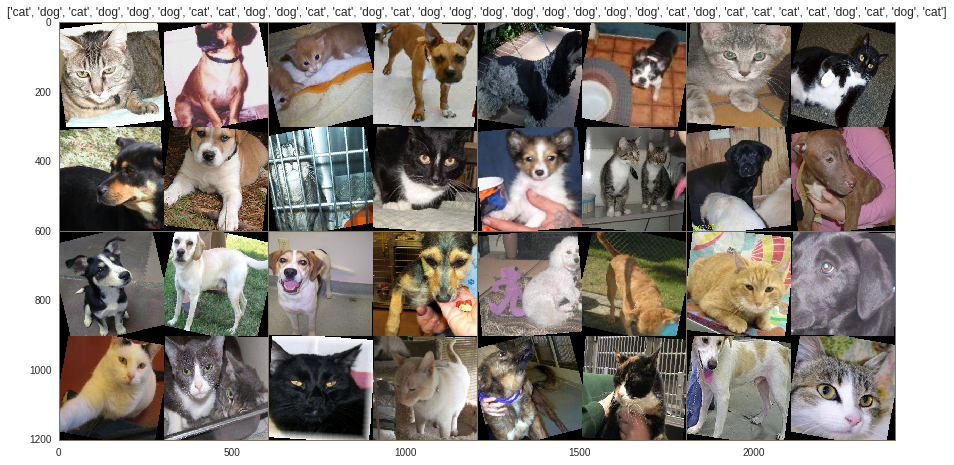

In [0]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.grid(None)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

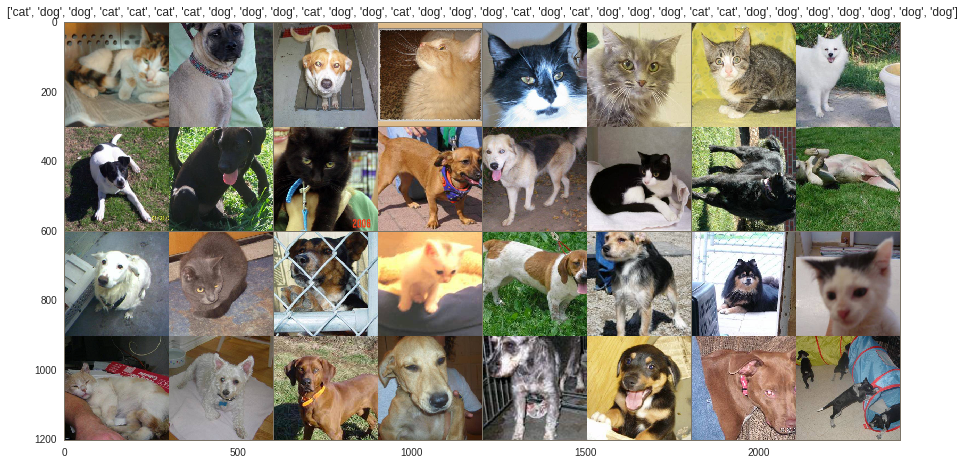

In [0]:
# Get a batch of testing data
inputs, classes = next(iter(dataloaders['test']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Freezing

In [6]:
from torchvision.models.inception import inception_v3

model = inception_v3(pretrained=True,      # load existing weights
                     transform_input=True, # preprocess input image the same way as in training
                    )

model.aux_logits = False # don't predict intermediate logits (yellow layers at the bottom)
model.transform_input = False  #included in data_transforms.

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:15<00:00, 7155169.50it/s]


In [0]:
from copy import deepcopy  # in case you still need original model

model_ft = deepcopy(model)

**Change fc layer**

In [0]:
model_ft.fc = nn.Linear(in_features=model.fc.in_features, out_features=len(class_names), bias=True)
model_ft.cuda()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

**We can change last layers but let's just reuse small part of original Inception. We will freeze all parameters except a last few layers.**

In [0]:
not_freezed = ['fc','Mixed_7c','Mixed_7b']
train_parameters = []

In [0]:
for name, child in model_ft.named_children():
  if not name in not_freezed:
    print(name+" is freezed")
    for params in child.parameters():
      params.requires_grad = False
  else:
    print(name+" is NOT freezed")
    train_parameters.extend(child.parameters())

Conv2d_1a_3x3 is freezed
Conv2d_2a_3x3 is freezed
Conv2d_2b_3x3 is freezed
Conv2d_3b_1x1 is freezed
Conv2d_4a_3x3 is freezed
Mixed_5b is freezed
Mixed_5c is freezed
Mixed_5d is freezed
Mixed_6a is freezed
Mixed_6b is freezed
Mixed_6c is freezed
Mixed_6d is freezed
Mixed_6e is freezed
AuxLogits is freezed
Mixed_7a is freezed
Mixed_7b is NOT freezed
Mixed_7c is NOT freezed
fc is NOT freezed


## Training

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [0]:
def test_model(model):
  phase = 'test'
  model.eval()
  running_loss = 0.0
  running_corrects = 0
  for inputs, labels in dataloaders[phase]:
    inputs = inputs.to(device)
    labels = labels.to(device)
    with torch.set_grad_enabled(False):
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels)

    running_loss += loss.item() * inputs.size(0)
    running_corrects += torch.sum(preds == labels.data)

  loss = running_loss / dataset_sizes[phase]
  acc = running_corrects.double() / dataset_sizes[phase]
  print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, loss, acc))

In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(train_parameters, lr=0.001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.6)

In [0]:
model_ft = train_model(model_ft, criterion, optimizer, exp_lr_scheduler, num_epochs=20)

Epoch 0/19
----------
train Loss: 0.0443 Acc: 0.9829
val Loss: 0.0334 Acc: 0.9903

Epoch 1/19
----------
train Loss: 0.0350 Acc: 0.9866
val Loss: 0.0336 Acc: 0.9920

Epoch 2/19
----------
train Loss: 0.0286 Acc: 0.9885
val Loss: 0.0432 Acc: 0.9893

Epoch 3/19
----------
train Loss: 0.0261 Acc: 0.9908
val Loss: 0.0425 Acc: 0.9880

Epoch 4/19
----------
train Loss: 0.0259 Acc: 0.9906
val Loss: 0.0337 Acc: 0.9908

Epoch 5/19
----------
train Loss: 0.0188 Acc: 0.9931
val Loss: 0.0539 Acc: 0.9875

Epoch 6/19
----------
train Loss: 0.0177 Acc: 0.9932
val Loss: 0.0387 Acc: 0.9908

Epoch 7/19
----------
train Loss: 0.0161 Acc: 0.9942
val Loss: 0.0490 Acc: 0.9913

Epoch 8/19
----------
train Loss: 0.0148 Acc: 0.9948
val Loss: 0.0493 Acc: 0.9898

Epoch 9/19
----------
train Loss: 0.0162 Acc: 0.9939
val Loss: 0.0521 Acc: 0.9875

Epoch 10/19
----------
train Loss: 0.0141 Acc: 0.9952
val Loss: 0.0558 Acc: 0.9893

Epoch 11/19
----------
train Loss: 0.0123 Acc: 0.9965
val Loss: 0.0550 Acc: 0.9890

Ep

**Val accuracy jumps up and down. But as I found out, using fewer layers gives worse results.**

In [0]:
torch.save(model_ft.state_dict(), "models/model_ft_Mixed_7b.pkl")

In [0]:
test_model(model_ft)

test Loss: 0.0405 Acc: 0.9910


In [20]:
model_ft = deepcopy(model)
model_ft.fc = nn.Linear(in_features=model.fc.in_features, out_features=len(class_names), bias=True)
model_ft.cuda()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [23]:
not_freezed = ['fc','Mixed_7c','Mixed_7b','Mixed_7a']
train_parameters = []
for name, child in model_ft.named_children():
  if not name in not_freezed:
    print(name+" is freezed")
    for params in child.parameters():
      params.requires_grad = False
  else:
    print(name+" is NOT freezed")
    train_parameters.extend(child.parameters())

Conv2d_1a_3x3 is freezed
Conv2d_2a_3x3 is freezed
Conv2d_2b_3x3 is freezed
Conv2d_3b_1x1 is freezed
Conv2d_4a_3x3 is freezed
Mixed_5b is freezed
Mixed_5c is freezed
Mixed_5d is freezed
Mixed_6a is freezed
Mixed_6b is freezed
Mixed_6c is freezed
Mixed_6d is freezed
Mixed_6e is freezed
AuxLogits is freezed
Mixed_7a is NOT freezed
Mixed_7b is NOT freezed
Mixed_7c is NOT freezed
fc is NOT freezed


In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(train_parameters, lr=0.001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.6)

In [25]:
model_ft = train_model(model_ft, criterion, optimizer, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.0675 Acc: 0.9718
val Loss: 0.0341 Acc: 0.9878

Epoch 1/9
----------
train Loss: 0.0373 Acc: 0.9858
val Loss: 0.0375 Acc: 0.9860

Epoch 2/9
----------
train Loss: 0.0272 Acc: 0.9892
val Loss: 0.0308 Acc: 0.9895

Epoch 3/9
----------
train Loss: 0.0222 Acc: 0.9921
val Loss: 0.0311 Acc: 0.9898

Epoch 4/9
----------
train Loss: 0.0144 Acc: 0.9954
val Loss: 0.0279 Acc: 0.9905

Epoch 5/9
----------
train Loss: 0.0143 Acc: 0.9951
val Loss: 0.0288 Acc: 0.9908

Epoch 6/9
----------
train Loss: 0.0123 Acc: 0.9951
val Loss: 0.0267 Acc: 0.9913

Epoch 7/9
----------
train Loss: 0.0099 Acc: 0.9968
val Loss: 0.0256 Acc: 0.9922

Epoch 8/9
----------
train Loss: 0.0117 Acc: 0.9962
val Loss: 0.0326 Acc: 0.9910

Epoch 9/9
----------
train Loss: 0.0073 Acc: 0.9975
val Loss: 0.0298 Acc: 0.9915

Training complete in 84m 28s
Best val Acc: 0.992250


In [0]:
torch.save(model_ft.state_dict(), "models/model_ft_Mixed_7a.pkl")

In [28]:
test_model(model_ft)

test Loss: 0.0300 Acc: 0.9913


In [29]:
not_freezed = ['fc','Mixed_7c','Mixed_7b','Mixed_7a','Mixed_6e','Mixed_6d','Mixed_6c']
train_parameters = []
for name, child in model_ft.named_children():
  if not name in not_freezed:
    print(name+" is freezed")
    for params in child.parameters():
      params.requires_grad = False
  else:
    for params in child.parameters():
      params.requires_grad = True
    print(name+" is NOT freezed")
    train_parameters.extend(child.parameters())

Conv2d_1a_3x3 is freezed
Conv2d_2a_3x3 is freezed
Conv2d_2b_3x3 is freezed
Conv2d_3b_1x1 is freezed
Conv2d_4a_3x3 is freezed
Mixed_5b is freezed
Mixed_5c is freezed
Mixed_5d is freezed
Mixed_6a is freezed
Mixed_6b is freezed
Mixed_6c is NOT freezed
Mixed_6d is NOT freezed
Mixed_6e is NOT freezed
AuxLogits is freezed
Mixed_7a is NOT freezed
Mixed_7b is NOT freezed
Mixed_7c is NOT freezed
fc is NOT freezed


In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(train_parameters, lr=0.0001)

# Decay LR by a factor of 0.1 every 10 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.6)

In [33]:
model_ft = train_model(model_ft, criterion, optimizer, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.0094 Acc: 0.9966
val Loss: 0.0277 Acc: 0.9918

Epoch 1/9
----------
train Loss: 0.0108 Acc: 0.9965
val Loss: 0.0258 Acc: 0.9908

Epoch 2/9
----------
train Loss: 0.0084 Acc: 0.9969
val Loss: 0.0279 Acc: 0.9913

Epoch 3/9
----------
train Loss: 0.0074 Acc: 0.9977
val Loss: 0.0295 Acc: 0.9915

Epoch 4/9
----------
train Loss: 0.0055 Acc: 0.9981
val Loss: 0.0294 Acc: 0.9922

Epoch 5/9
----------
train Loss: 0.0047 Acc: 0.9988
val Loss: 0.0257 Acc: 0.9908

Epoch 6/9
----------
train Loss: 0.0049 Acc: 0.9983
val Loss: 0.0279 Acc: 0.9920

Epoch 7/9
----------
train Loss: 0.0041 Acc: 0.9988
val Loss: 0.0322 Acc: 0.9913

Epoch 8/9
----------
train Loss: 0.0039 Acc: 0.9989
val Loss: 0.0338 Acc: 0.9908

Epoch 9/9
----------
train Loss: 0.0028 Acc: 0.9991
val Loss: 0.0333 Acc: 0.9913

Training complete in 102m 40s
Best val Acc: 0.992250


In [34]:
test_model(model_ft)

test Loss: 0.0326 Acc: 0.9920


In [0]:
torch.save(model_ft.state_dict(), "models/model_ft_Mixed_6c.pkl")

# Bonus: #deepdream

https://twitter.com/search?q=%23deepdream&src=typd

Code is heavily based on https://github.com/thesemicolonguy/deep-dream-pytorch

Original blogpost where more ideas can be taken from: https://research.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html

In [5]:
from PIL import Image, ImageFilter, ImageChops
from torchvision import transforms
import numpy as np

In [21]:
model.to(device)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [4]:
modulelist = list(model.children())

In [5]:
plt.rcParams['figure.figsize'] = 10, 8

In [6]:
preprocess = transforms.Compose([
    transforms.Resize((299, 299)),  
    transforms.ToTensor()#,
    ])

def dd_helper(image, layer, iterations, lr):        
    
    input_var = torch.tensor(preprocess(image).unsqueeze(0), requires_grad=True, device=device)
    model.zero_grad()
    for i in range(iterations):
        out = input_var
        for j in range(layer):
            out = modulelist[j](out)
        loss = out.norm()
        loss.backward()
        input_var.data = input_var.data + lr * input_var.grad.data
    
    input_im = input_var.detach().squeeze().cpu()
    input_im.transpose_(0,1)
    input_im.transpose_(1,2)
    input_im = np.clip(input_im, 0, 1)
    im = Image.fromarray(np.uint8(input_im * 255))
    return im

In [7]:
def deep_dream_vgg(image, layer, iterations, lr, octave_scale, num_octaves):
    if num_octaves>0:
        image1 = image.filter(ImageFilter.GaussianBlur(2))
        if (image1.size[0] / octave_scale < 1 or image1.size[1] / octave_scale < 1):
            size = image1.size
        else:
            size = (int(image1.size[0] / octave_scale), int(image1.size[1] / octave_scale))
            
        image1 = image1.resize(size, Image.ANTIALIAS)
        image1 = deep_dream_vgg(image1, layer, iterations, lr, octave_scale, num_octaves-1)
        size = (image.size[0], image.size[1])
        image1 = image1.resize(size, Image.ANTIALIAS)
        image = ImageChops.blend(image, image1, 0.6)
    print("-------------- Recursive level: ", num_octaves, '--------------')
    img_result = dd_helper(image, layer, iterations, lr)
    img_result = img_result.resize(image.size)
    plt.imshow(img_result)
    return img_result

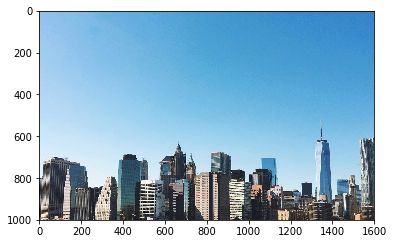

In [19]:
img = Image.fromarray(plt.imread('images/sky.jpg'))
plt.imshow(img)

-------------- Recursive level:  0 --------------
-------------- Recursive level:  1 --------------
-------------- Recursive level:  2 --------------
-------------- Recursive level:  3 --------------
-------------- Recursive level:  4 --------------
-------------- Recursive level:  5 --------------
-------------- Recursive level:  6 --------------
-------------- Recursive level:  7 --------------
-------------- Recursive level:  8 --------------
-------------- Recursive level:  9 --------------
-------------- Recursive level:  10 --------------
-------------- Recursive level:  11 --------------
-------------- Recursive level:  12 --------------
-------------- Recursive level:  13 --------------
-------------- Recursive level:  14 --------------
-------------- Recursive level:  15 --------------
-------------- Recursive level:  16 --------------
-------------- Recursive level:  17 --------------
-------------- Recursive level:  18 --------------
-------------- Recursive level:  19 -----

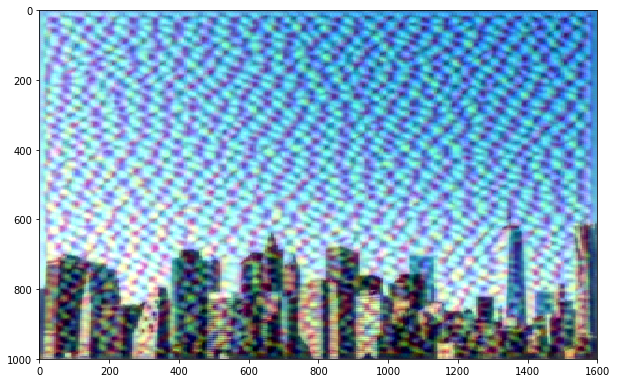

In [18]:
output = deep_dream_vgg(img, 5, 5, 0.3, 2, 20)

In [14]:
for k,v in labels.items():
    if "banana" in v:
        print(v+" "+str(k))

banana 954


In [35]:
#can you implement one class probability optimization to make model dream about bananas
def banana(image):
    img = imresize(image, (299,299)) / 255.
    plt.imshow(img)
    plt.show()
    img = torch.tensor(img.reshape([1, 299, 299, 3]).transpose([0,3,1,2]),dtype=torch.float32,requires_grad=True,device=device)
    for i in range(100):
        out = model(img)
        log_probs = torch.nn.functional.log_softmax(out, dim=-1)
        logp = log_probs[0, 954]
        logp.backward()
        img.data += img.grad.data
        img.data.clamp_(0, 1)
        img.grad.zero_();
        proba = torch.nn.functional.softmax(out, dim=-1).data.cpu().numpy()[0,954]
        print("banana probability: "+str(proba))
        if proba >= 0.9:
            break
    new_image = img.data.squeeze().cpu().numpy().transpose([1,2,0])
    return new_image

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


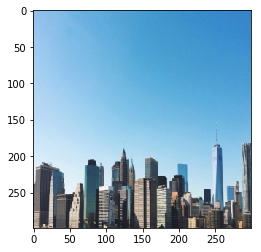

banana probability: 0.0006447537
banana probability: 0.0014422114
banana probability: 0.0011722149
banana probability: 0.0046999226
banana probability: 0.009872133
banana probability: 0.004433303
banana probability: 0.02028737
banana probability: 0.07213008
banana probability: 0.043526012
banana probability: 0.54678416
banana probability: 0.94709736


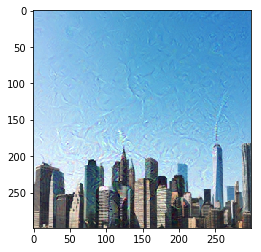

In [36]:
image = banana(img)
plt.imshow(image)
plt.show()